In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
df=pd.read_csv('problem.csv')
df

,Unnamed: 0,Gender,Age,Weight,sleep_problems,suicide_attempts,shock,related_diseases,Academic_performance,dipression_ratio
0,0,male,20.0,80.0,no,yes,yes,no,yes,10.0
1,1,male,21.0,78.0,sometimes,no,no,no,no,6.0
2,2,female,20.0,67.0,sometimes,no,no,no,no,7.0
3,3,male,23.0,78.0,sometimes,no,no,no,yes,8.0
4,4,male,22.0,78.0,no,yes,no,yes,not student,1.0
...,...,...,...,...,...,...,...,...,...,...
291,291,female,NaN,NaN,sometimes,no,yes,no,not student,5.0
292,292,male,47.0,87.0,yes,no,no,no,not student,5.0
293,293,male,47.0,87.0,yes,no,no,no,not student,5.0
294,294,male,57.0,97.0,sometimes,no,no,no,not student,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Weight', 'sleep_problems',
       'suicide_attempts', 'shock', 'related_diseases', 'Academic_performance',
       'dipression_ratio'],
      dtype='object')

In [ ]:
df['Gender'].replace({"male": "1", "female": "2"}, inplace=True)
df['Gender'] = df['Gender'].astype(float)
df['sleep_problems'].replace({"yes": "1", "no": "2","sometimes": "3"}, inplace=True)
df['sleep_problems'] = df['sleep_problems'].astype(float)
df['suicide_attempts'].replace({"yes": "1", "no": "2"}, inplace=True)
df['suicide_attempts'] = df['suicide_attempts'].astype(float)

df['related_diseases'].replace({"yes": "1", "no": "2"}, inplace=True)
df['related_diseases'] = df['related_diseases'].astype(float)
df['Academic_performance'].replace({"yes": "1", "no": "2","not student":"3"}, inplace=True)
df['Academic_performance'] = df['Academic_performance'].astype(float)
df.head()

,Unnamed: 0,Gender,Age,Weight,sleep_problems,suicide_attempts,shock,related_diseases,Academic_performance,dipression_ratio
0,0,1.0,20.0,80.0,2.0,1.0,yes,2.0,1.0,10.0
1,1,1.0,21.0,78.0,3.0,2.0,no,2.0,2.0,6.0
2,2,2.0,20.0,67.0,3.0,2.0,no,2.0,2.0,7.0
3,3,1.0,23.0,78.0,3.0,2.0,no,2.0,1.0,8.0
4,4,1.0,22.0,78.0,2.0,1.0,no,1.0,3.0,1.0


In [ ]:
df.describe()

,Unnamed: 0,Gender,Age,Weight,sleep_problems,suicide_attempts,related_diseases,Academic_performance,dipression_ratio
count,296.000000,294.000000,290.000000,244.000000,295.000000,294.000000,295.000000,293.000000,294.000000
mean,147.500000,1.591837,22.768966,64.401230,2.105085,1.853741,1.955932,1.645051,5.340136
std,85.592056,0.492332,9.691705,17.703517,0.815960,0.353968,0.205595,0.670017,2.717650
min,0.000000,1.000000,15.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,73.750000,1.000000,19.000000,54.750000,1.000000,2.000000,2.000000,1.000000,3.000000
50%,147.500000,2.000000,20.500000,62.000000,2.000000,2.000000,2.000000,2.000000,5.000000
75%,221.250000,2.000000,22.000000,70.250000,3.000000,2.000000,2.000000,2.000000,7.750000
max,295.000000,2.000000,101.000000,202.000000,3.000000,2.000000,2.000000,3.000000,10.000000


In [ ]:
df.isnull().sum()

Unnamed: 0               0
Gender                   2
Age                      6
Weight                  52
sleep_problems           1
suicide_attempts         2
shock                    2
related_diseases         1
Academic_performance     3
dipression_ratio         2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
control_1 = pd.read_csv('problem.csv')
condition_1 = pd.read_csv('problem.csv')
print(f'control_1.shape: {control_1.shape}')
print(f'condition_1.shape: {condition_1.shape}')


control_1.shape: (296, 10)
condition_1.shape: (296, 10)


In [ ]:
control_1.head()

,Unnamed: 0,Gender,Age,Weight,sleep_problems,suicide_attempts,shock,related_diseases,Academic_performance,dipression_ratio
0,0,male,20.0,80.0,no,yes,yes,no,yes,10.0
1,1,male,21.0,78.0,sometimes,no,no,no,no,6.0
2,2,female,20.0,67.0,sometimes,no,no,no,no,7.0
3,3,male,23.0,78.0,sometimes,no,no,no,yes,8.0
4,4,male,22.0,78.0,no,yes,no,yes,not student,1.0


In [ ]:
condition_1.head()

,Unnamed: 0,Gender,Age,Weight,sleep_problems,suicide_attempts,shock,related_diseases,Academic_performance,dipression_ratio
0,0,male,20.0,80.0,no,yes,yes,no,yes,10.0
1,1,male,21.0,78.0,sometimes,no,no,no,no,6.0
2,2,female,20.0,67.0,sometimes,no,no,no,no,7.0
3,3,male,23.0,78.0,sometimes,no,no,no,yes,8.0
4,4,male,22.0,78.0,no,yes,no,yes,not student,1.0


In [ ]:
condition_1.describe()

,Unnamed: 0,Age,Weight,dipression_ratio
count,296.000000,290.000000,244.000000,294.000000
mean,147.500000,22.768966,64.401230,5.340136
std,85.592056,9.691705,17.703517,2.717650
min,0.000000,15.000000,20.000000,1.000000
25%,73.750000,19.000000,54.750000,3.000000
50%,147.500000,20.500000,62.000000,5.000000
75%,221.250000,22.000000,70.250000,7.750000
max,295.000000,101.000000,202.000000,10.000000


<AxesSubplot:xlabel='Dipression_ratio', ylabel='Count'>

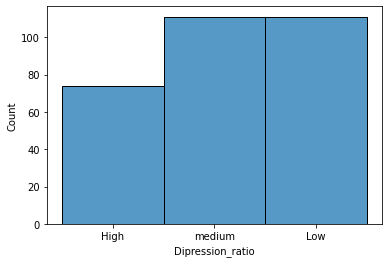

In [ ]:
sns.histplot(x='Dipression_ratio', data=condition_1)

In [ ]:
data = df
for col in data.columns:
    if data[col].dtype != np.object: # check only numeric columns
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        if not outliers.empty:
            print('Outliers in column {}:'.format(col))
            outliers

Outliers in column Age:
Outliers in column Weight:
Outliers in column suicide_attempts:
Outliers in column related_diseases:


<ipython-input-13-a652782e17ec>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data[col].dtype != np.object: # check only numeric columns


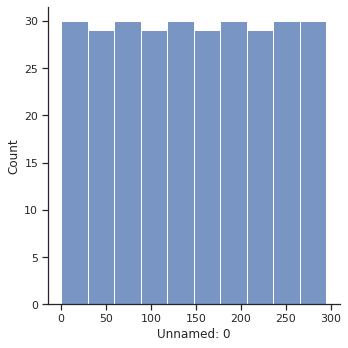

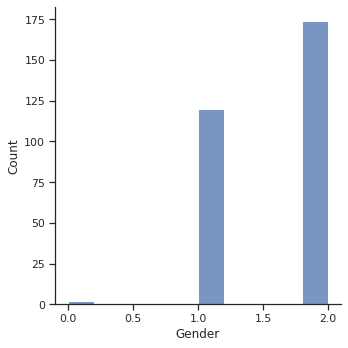

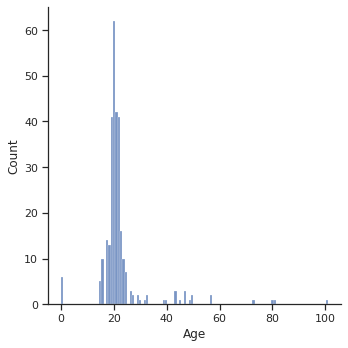

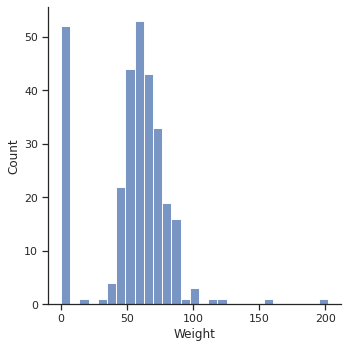

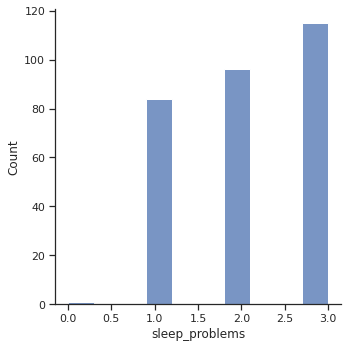

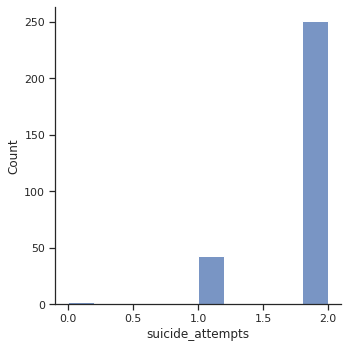

In [29]:
for column in df.columns[:6]:  # Loop over all columns except 'Location'
    sns.set()
    sns.set(style="ticks")
    sns.displot(df[column])
    plt.show()

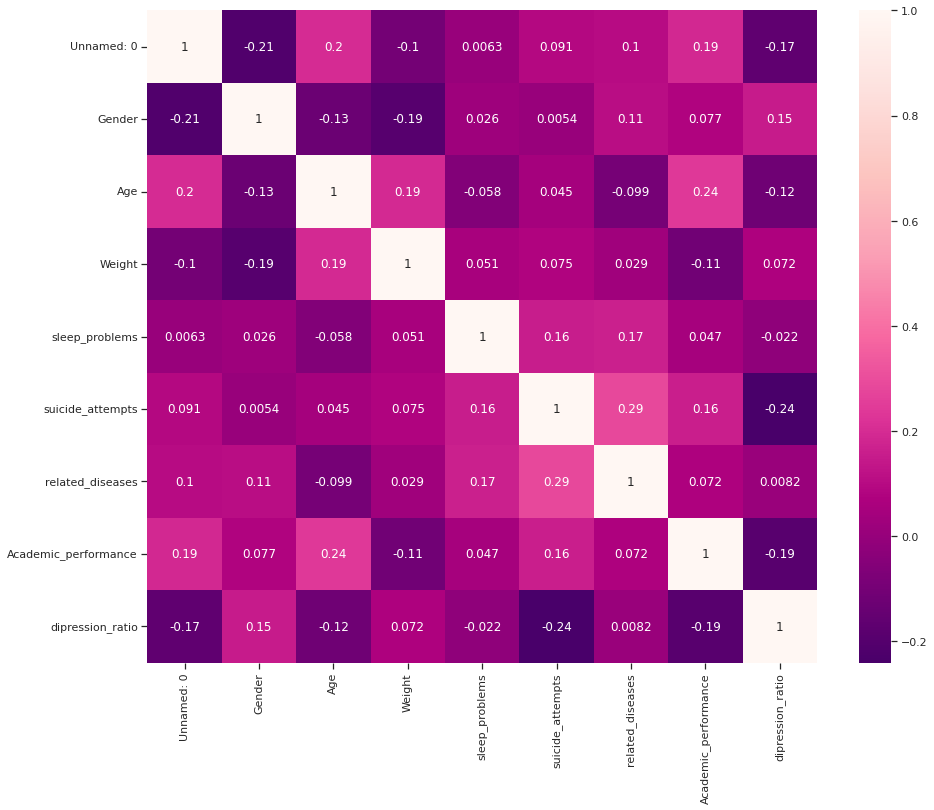

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

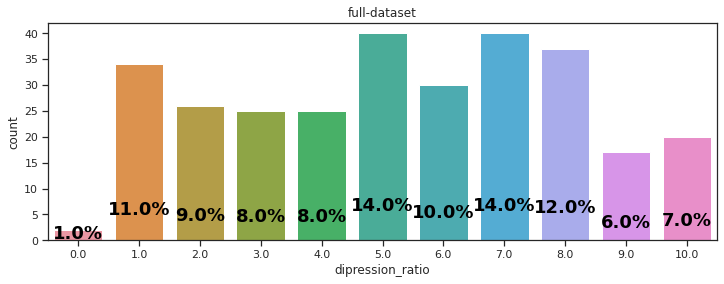

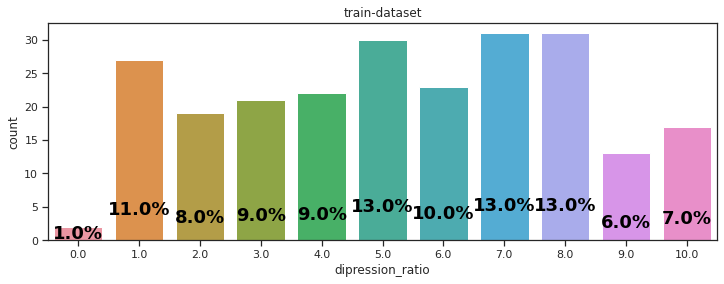

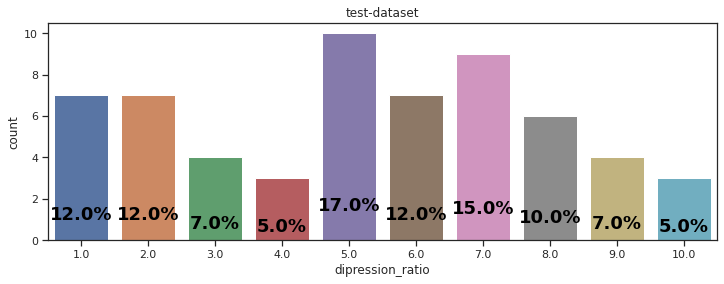

In [36]:
def visualize_ds(df: pd.DataFrame, title: str) -> None:

    plt.figure(figsize=(12, 4))
    ax = sns.countplot(data=df, x='dipression_ratio')
    ax.set_title(title)

    for i in ax.patches:

        ax.text(
            x=i.get_x() + i.get_width() / 2,
            y=i.get_y() + i.get_height() / 7,
            s=f"{np.round(i.get_height() / len(df)* 100.)}%",
            ha="center",
            size="18",
            weight="bold",
            color="black"
        )
        
train_df, test_df = train_test_split(df, test_size=0.2)

visualize_ds(df, "full-dataset")
visualize_ds(train_df, "train-dataset")
visualize_ds(test_df, "test-dataset")

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
corr_matrix

,Unnamed: 0,Gender,Age,Weight,sleep_problems,suicide_attempts,related_diseases,Academic_performance,Dipression_ratio
Unnamed: 0,1.000000,-0.214188,0.199105,-0.104372,0.005677,0.071866,0.113935,0.194878,-0.162479
Gender,-0.214188,1.000000,-0.129922,-0.192653,-0.013043,-0.038084,0.018021,0.045849,0.117019
Age,0.199105,-0.129922,1.000000,0.193064,-0.086140,0.002107,-0.186100,0.228674,-0.149158
Weight,-0.104372,-0.192653,0.193064,1.000000,0.029060,0.050658,-0.026941,-0.127643,0.029355
sleep_problems,0.005677,-0.013043,-0.086140,0.029060,1.000000,0.125291,0.109366,0.027682,-0.051383
suicide_attempts,0.071866,-0.038084,0.002107,0.050658,0.125291,1.000000,0.192367,0.123471,-0.240122
related_diseases,0.113935,0.018021,-0.186100,-0.026941,0.109366,0.192367,1.000000,0.008506,-0.063853
Academic_performance,0.194878,0.045849,0.228674,-0.127643,0.027682,0.123471,0.008506,1.000000,-0.101871
Dipression_ratio,-0.162479,0.117019,-0.149158,0.029355,-0.051383,-0.240122,-0.063853,-0.101871,1.000000


In [ ]:
# get highest column correlation
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if corr_matrix.loc[row, col] > 0.7 and corr_matrix.loc[row, col] < 1:
            print(row, col, corr_matrix.loc[row, col])

In [ ]:
in_x = [ 'Dipression_ratio']

In [ ]:
X = df[in_x]

In [ ]:
y = df['Dipression_ratio']

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import numpy as np


# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
y_pred1 = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 1.0
Mean Squared Error: 1.4791141972893971e-31
R^2 Score: 1.0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 0.55
Mean Squared Error: 0.45
R^2 Score: 0.9454527088454157


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the performance of the model
y_pred1 = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 1.0
Mean Squared Error: 4.2072581611787294e-30
R^2 Score: 1.0


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
y_pred1 = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 0.9666666666666667
Mean Squared Error: 0.06545541251658257
R^2 Score: 0.9920657434573656


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
y_pred1 = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 0.9666666666666667
Mean Squared Error: 0.03333333333333333
R^2 Score: 0.9959594599144752


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Train a Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
y_pred1 = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 0.9666666666666667
Mean Squared Error: 0.03333333333333333
R^2 Score: 0.9959594599144752


In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Train a KNN regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
y_pred1 = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 0.9666666666666667
Mean Squared Error: 0.03333333333333333
R^2 Score: 0.9959594599144752


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Train a Gradient Boosted Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
y_pred1 = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Accuracy: 0.9666666666666667
Mean Squared Error: 0.03334219878569871
R^2 Score: 0.9959583852780055
